# Basic strategy: 
## Training:
   For each digit 0-9, find the average pixel value at each pixel location in the 28 * 28 greyscale image.
   This gives the "average" image of what a typical image of a 0, 1, 2, ..., and 9 digit image looks like.
## Infering:
   Using the test image, find the average digit 'template' that has the smallest sum squarred error.
   So use the sum squared distance between the test image and the "average" digit image. Find the square of the difference between the test image and each "average" image 0-9. Choose the "average" image with the smallest sum squared error, and use it's digit value.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # image display

import ipywidgets as widgets

# For explicitly displaying widgets
from IPython.display import display, clear_output
# Input data files are available in the '../input/' directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('../input'))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'train.csv', 'test.csv']


In [2]:
df = pd.read_csv('../input/train.csv')
print(df.shape)

(42000, 785)


In [3]:
# Slider to view images and their labels

image_id_slider = widgets.IntSlider(
    min=0,                      # The minimum value
    max=df.shape[1] - 1,        # The maximum value
    description='Image ID',     # Label
    value=0,                    # Default value
)

image_id_slider_output = widgets.Output()

# Display the widget
display(image_id_slider, image_id_slider_output)


def display_image(image_id: int):
    clear_output(wait=True)
    print('Image ID: ' + str(image_id) + ', label is: ' + str(df.loc[image_id]['label']))
    
    # Read the first letter (28 * 28 = 784 pixels) from pandas
    # dataframe, excluding the leftmost entry, the label.
    # Reshape it into a 28 by 28 pixel image
    
    image0 = np.array(df.loc[image_id][1:])
    image0 = np.reshape(image0, [28, 28])
    plt.clf()
    plt.imshow(image0, cmap='gray_r')
    plt.colorbar()
    plt.show()

def on_slider_change(change):
    with image_id_slider_output:
        display_image(change['new'])

# image_id_slider.observe(display_image)
image_id_slider.observe(on_slider_change, names='value')
# display_image(0)


IntSlider(value=0, description='Image ID', max=784)

Output()

Image ID: 0, label is: 1


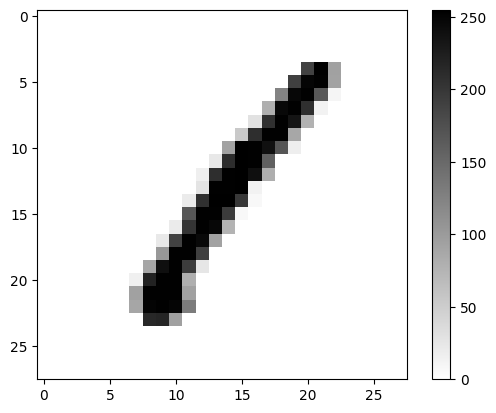

In [4]:
# Display image
image0 = np.array(df.loc[image_id_slider.value][1:]) # Read the first letter (28 * 28 = 784 pixels) from pandas dataframe (excluding the leftmost entry, the label)
image0 = np.reshape(image0, [28, 28]) # Reshape it into a 28 by 28 pixel image
plt.imshow(image0, cmap='gray_r')
plt.colorbar()

print('Image ID: ' + str(image_id_slider.value) + ', label is: ' + str(df.loc[image_id_slider.value]['label']))


In [5]:
Y = np.array(df['label'], dtype=np.int64)
X = np.array(df.drop(labels = ['label'], axis = 1), dtype=np.int64) 

In [6]:
# Calculate the average image pixel values for every digit 0-9. So this would be the sum of all digits corresponsing to a particular category
# There are 10 classes (digits 0-9) and each class is 28*28 pixels
average_digits = np.zeros((10, 28*28), dtype=np.int64) # Sum (and later average) of all digits of each class
count_in_class = np.zeros(10, dtype=np.int64) # Stores a count of how many of each digit occurred

In [7]:
# Iterate through each image, and add the image vector to the correct row of the average_digits matrix
for x, y in zip(X, Y):
    average_digits[y] += x
    count_in_class[y] += 1

# Calculate average digits
for i, count in enumerate(count_in_class):
    average_digits[i] = np.float64(average_digits[i]) / np.float64(count)

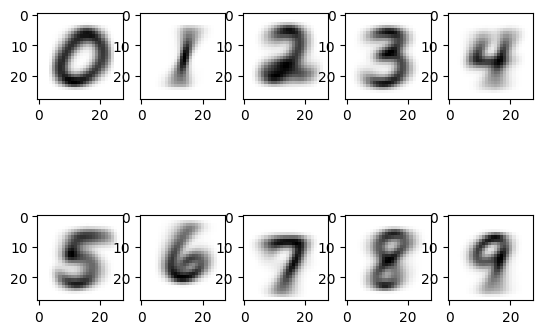

In [8]:
# Display average digits
for i in range(len(count_in_class)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.reshape(average_digits[i], [28, 28]), cmap='gray_r')

In [9]:
# Calculate distance from average.
test_data = np.array(pd.read_csv('../input/test.csv'), dtype=np.float64)

In [10]:
# Input: Each row should have 784 (ie 28*28) numbers. Each row is one image.
# The number of rows is the number of predictions that will be made.
def make_predictions(input_data):
    # Predict test data digit based on sum squared error from average
    prediction = np.zeros(input_data.shape[0], dtype=np.int64)
    for i_input, input_image in enumerate(input_data):
        root_mean_square_error = np.zeros(average_digits.shape[0])
        for i_average, average_image in enumerate(average_digits):
            root_mean_square_error[i_average] = np.sum((average_image - input_image)**2)
        prediction[i_input] = np.argmin(root_mean_square_error)
    return prediction

test_prediction = make_predictions(test_data)

Predicted label: 1


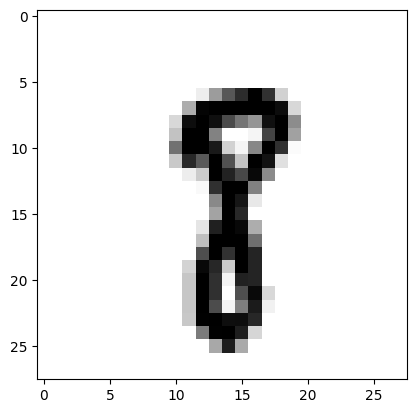

In [11]:
# Random example with test data
sample_test_image_index = np.random.randint(low=0, high=test_data.shape[0])
sample_prediction = test_prediction[sample_test_image_index]
plt.imshow(np.reshape(test_data[sample_test_image_index], [28, 28]), cmap='gray_r')

print(f'Predicted label: {sample_prediction}')

In [12]:
train_prediction = make_predictions(X)
print(len(Y), len(train_prediction))

42000 42000


In [13]:
# !python3 -m pip show scikit-learn
# !pip3 --version
# !pip3 install --upgrade scikit-learn

In [14]:
!python3 -m pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lightgbm, lime, mapclassify, mlxtend, nilearn, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, Wordbatch, yellowbrick


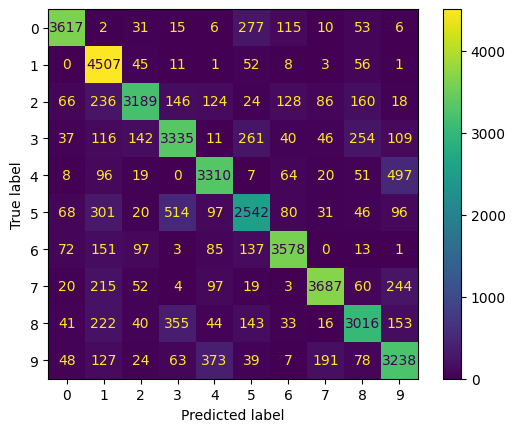

In [15]:
# Performance on training data.
# This is not a good practice, but can show the "fit" of the model to the training data.
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y, train_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [16]:
submission_df = pd.DataFrame({'ImageId': np.arange(1, test_data.shape[0] + 1), 'Label': test_prediction})

In [17]:
submission_df.to_csv('submission.csv', index=False)

# Useful links:
* https://www.kaggle.com/c/digit-recognizer/data
* https://www.geeksforgeeks.org/image-classifier-using-cnn/
* https://towardsdatascience.com/digit-recognizer-introduction-to-kaggle-competitions-with-image-classification-task-0-995-268fa2b90e13
* https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
* https://opencv.org/
* https://github.com/gsurma/digit_recognizer/blob/master/digit_recognizer.ipynb
* https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
* https://www.geeksforgeeks.org/reading-image-opencv-using-python/
* https://www.geeksforgeeks.org/python-image-classification-using-keras/
* https://matplotlib.org/users/image_tutorial.html
* https://www.kaggle.com/code/maevaralafi/diving-into-ipython-widgets